<a href="https://colab.research.google.com/github/Smurfanki/customer-behaviour-and-seasonal-trend-analysis/blob/main/Week_17_Graded_Mini_Project_Prakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkorange" size="+3"><b>                ___________🌟 Monthly Revenue Trends 🌟_______</b></font>

# <font color="darkcyan" size="+3"><b>Task 1: Data Preparation</b></font>

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




# <font color="magenta" size="+3"><b>Clean and process data</b></font>

In [ ]:
df = pd.read_csv('/content/Retail_Transactions_Dataset.csv')
df.head()


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [ ]:

df.shape


(12363, 13)

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     12363 non-null  int64  
 1   Date               12363 non-null  object 
 2   Customer_Name      12363 non-null  object 
 3   Product            12363 non-null  object 
 4   Total_Items        12363 non-null  int64  
 5   Total_Cost         12363 non-null  float64
 6   Payment_Method     12363 non-null  object 
 7   City               12363 non-null  object 
 8   Store_Type         12363 non-null  object 
 9   Discount_Applied   12363 non-null  bool   
 10  Customer_Category  12363 non-null  object 
 11  Season             12362 non-null  object 
 12  Promotion          8248 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [ ]:

pd.isnull(df).sum()


,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Items,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,0


In [ ]:

df['Promotion'].fillna('no promotion', inplace=True)
display(df.head())


/tmp/ipython-input-3226152952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Promotion'].fillna('no promotion', inplace=True)


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,no promotion
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,no promotion
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,no promotion
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# <font color="magenta" size="+3"><b>Date Formatting</b></font>

In [ ]:

df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d %H:%M:%S')
df.head()


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,no promotion
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,no promotion
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,no promotion
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [ ]:
#Extracting Year, Month, Day , Dayofweek

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name().str[:3]
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Year,Month,Day,DayOfWeek
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,no promotion,2022,1,21,Fri
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023,3,1,Wed
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,no promotion,2024,3,21,Thu
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,no promotion,2020,10,31,Sat
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,12,10,Thu


# <font color="Darkcyan" size="+3"><b>Task 2: Basic Exploration</b></font>

# <font color="magenta" size="+2"><b>2.1 Total number of transactions  </b></font>

In [ ]:

# 2.1- ** Total number of transactions **

total_transactions = df['Transaction_ID'].nunique()
print(f'Total number of transactions: {total_transactions}')


Total number of transactions: 12363


# <font color="magenta" size="+2"><b>2.2 How many unique customers are in the dataset? </b></font>

In [ ]:

# 2.2- **How many unique customers are in the dataset?**

unique_customers = df['Customer_Name'].nunique()
print("Unique Customers:", unique_customers)


Unique Customers: 11482


# <font color="magenta" size="+2"><b>2.3 What are the top 5 most common products sold across all transactions? </b></font>

In [ ]:
# 2.3- ** What are the top 5 most common products sold across all transactions? **
# Lowercase and remove square brackets
df['Product'] = df['Product'].str.lower().str.replace('[', '').str.replace(']', '')

#Break into rows
prod_per_row = df['Product'].str.split(',').explode().str.strip()

# Count products
product_counts = prod_per_row.value_counts().reset_index()
product_counts.columns = ['Product', 'Count']


top5 = product_counts.head(5)
print("Top 5 most common products sold:\n")
print(top5.to_string(index=False))


Top 5 most common products sold:

     Product  Count
'toothpaste'    919
   'carrots'    513
   'vinegar'    499
       'mop'    497
   'sponges'    496


# <font color="magenta" size="+2"><b>2.4 Which cities have the highest number of transactions? </b></font>

In [ ]:
# ** Which cities have the highest number of transactions? **
city_transactions = df['City'].value_counts()

print("Cities with highest transactions:\n")

print(city_transactions.rename_axis('City').reset_index(name='Count').to_string(index=False))


Cities with highest transactions:

         City  Count
San Francisco   1272
       Dallas   1272
  Los Angeles   1260
      Seattle   1256
      Atlanta   1244
       Boston   1234
      Chicago   1226
      Houston   1210
     New York   1201
        Miami   1188


# <font color="darkcyan" size="+3"><b>Task 3: Customer Behaviour Analysis</b></font>

# <font color="magenta" size="+2"><b>3.1. Which customer categories spend the most on average?</b></font>

In [ ]:


# 1. Which customer categories spend the most on average?

avg_spend_by_customer_category = df.groupby('Customer_Category')['Total_Cost'].mean().sort_values(ascending=False)

avg_spend_by_customer_category.columns = ['Customer Category', 'Average Spend']


print("Average spend by customer category:\n")
print(avg_spend_by_customer_category.rename_axis('Customer Category').reset_index(name='Average Spend').to_string(index=False)  )




Average spend by customer category:

Customer Category  Average Spend
         Teenager      52.529091
     Professional      52.525762
          Student      52.487994
        Homemaker      52.461417
      Young Adult      52.448246
          Retiree      52.435589
      Middle-Aged      52.411318
   Senior Citizen      52.342672


# <font color="magenta" size="+2"><b>3.2 Do certain customer categories prefer specific payment methods?</b></font>

In [ ]:

# 2. Do certain customer categories prefer specific payment methods?

from tabulate import tabulate

category_payment_pref = df.groupby(['Customer_Category', 'Payment_Method'])['Transaction_ID'].count().unstack()

print("\nPayment method preference by customer category:\n", category_payment_pref)

# percentages
category_payment_percent = category_payment_pref.div(category_payment_pref.sum(axis=1), axis=0) * 100
print("\nPayment method preference (%) by customer category:\n", category_payment_percent.round(2))



Payment method preference by customer category:
 Payment_Method     Cash  Credit Card  Debit Card  Mobile Payment
Customer_Category                                               
Homemaker           412          391         412             408
Middle-Aged         371          367         378             357
Professional        383          390         395             392
Retiree             362          376         359             389
Senior Citizen      387          413         393             391
Student             373          386         380             416
Teenager            380          381         408             352
Young Adult         400          372         378             411

Payment method preference (%) by customer category:
 Payment_Method      Cash  Credit Card  Debit Card  Mobile Payment
Customer_Category                                                
Homemaker          25.39        24.09       25.39           25.14
Middle-Aged        25.19        24.92       25.6

# <font color="magenta" size="+2"><b>3.3 Average number of items bought per transaction per store type</b></font>

In [ ]:

# 3. Average number of items bought per transaction per store type

avg_items_per_store = df.groupby('Store_Type')['Total_Items'].mean().sort_values(ascending=False)
avg_items_per_store.columns = ['Store Type', 'Average Items']

print("Average number of items per transaction per store type:\n\n")
print(avg_items_per_store.rename_axis('Store Type').reset_index(name='Average Items').to_string(index=False))


Average number of items per transaction per store type:


       Store Type  Average Items
  Specialty Store       5.614598
 Department Store       5.601323
Convenience Store       5.538311
         Pharmacy       5.514973
      Supermarket       5.476923
   Warehouse Club       5.465898


# <font color="darkcyan" size="+3"><b>Task 4: Promotion & Discount Impact</b></font>

<font color="magenta" size="+2"><b> 4.1 Average cost with vs without discount</b></font>

In [ ]:

# 1. Average cost with vs without discount

avg_cost_discount = df.groupby('Discount_Applied')['Total_Cost'].mean()
avg_cost_discount.columns = ['Discount Applied', 'Average Total Cost']
print("Average cost with vs without discount:\n")
print(avg_cost_discount.rename_axis('Discount Applied').reset_index
 (name='Average Total Cost').to_string(index=False))




Average cost with vs without discount:

 Discount Applied  Average Total Cost
            False           52.381626
             True           52.819574


<font color="magenta" size="+2"><b>4.2 Average number of items purchased for different promotion type</b></font>

In [ ]:

# 2. Average number of items purchased for each promotion type

avg_items_promo = df.groupby('Promotion')['Total_Items'].mean().sort_values(ascending=False)
avg_items_promo.columns = ['Promotion', 'Average Items']
print("Average number of items by promotion type:\n")
print(avg_items_promo.rename_axis('Promotion').reset_index(name='Average Items').to_string(index=False))



Average number of items by promotion type:

                 Promotion  Average Items
    BOGO (Buy One Get One)       5.596341
Discount on Selected Items       5.558100
              no promotion       5.456136


<font color="magenta" size="+2"><b>4.3  Which promotion type seems to be most effective in terms of increasing total cost? </b></font>

In [ ]:

# 3. Promotion type most effective in increasing total cost

avg_cost_promo = (
    df[df['Promotion'] != 'no promotion']
    .groupby('Promotion')['Total_Cost']
    .mean()
    .sort_values(ascending=False))
avg_cost_promo.columns = ['Promotion', 'Average Total Cost']

print("Average total cost by promotion type:\n")
print(avg_cost_promo.rename_axis('Promotion').reset_index(name='Average Total Cost').to_string(index=False))

Average total cost by promotion type:

                 Promotion  Average Total Cost
    BOGO (Buy One Get One)           52.755334
Discount on Selected Items           52.205540


# <font color="darkcyan" size="+3"><b>Task 5: Seasonality Trends</b></font>

# <font color="magenta" size="+2"><b># 5.1. Which season has the highest total revenue?</b></font>

In [ ]:
# 1. Which season has the highest total revenue?


season_revenue = df.groupby('Season')['Total_Cost'].sum().sort_values(ascending=False)

# Add a percentage column
season_revenue_percentage = (season_revenue / season_revenue.sum()) * 100

# Combine
season_revenue_df = pd.DataFrame({
    'Total_Revenue': season_revenue,
    'Percentage': season_revenue_percentage})

print("Total revenue by season with percentage:\n\n", season_revenue_df)





Total revenue by season with percentage:

         Total_Revenue  Percentage
Season                           
Winter      165592.96   25.466592
Spring      163846.25   25.197965
Fall        161150.71   24.783417
Summer      159646.12   24.552026


# <font color="magenta" size="+2"><b># 5.2. Are there seasonal preference for certain store types or Product categories??</b></font>

In [ ]:

# 2. Seasonal preferences for store types

season_store_pref = df.groupby(['Season', 'Store_Type'])['Transaction_ID'].count().unstack()

print("\nSeasonal preferences for store types:\n")
print(tabulate(season_store_pref, headers='keys', tablefmt='fancy_grid'))



Seasonal preferences for store types:

╒══════════╤═════════════════════╤════════════════════╤════════════╤═══════════════════╤═══════════════╤══════════════════╕
│ Season   │   Convenience Store │   Department Store │   Pharmacy │   Specialty Store │   Supermarket │   Warehouse Club │
╞══════════╪═════════════════════╪════════════════════╪════════════╪═══════════════════╪═══════════════╪══════════════════╡
│ Fall     │                 504 │                511 │        499 │               570 │           507 │              488 │
├──────────┼─────────────────────┼────────────────────┼────────────┼───────────────────┼───────────────┼──────────────────┤
│ Spring   │                 518 │                528 │        541 │               539 │           511 │              484 │
├──────────┼─────────────────────┼────────────────────┼────────────┼───────────────────┼───────────────┼──────────────────┤
│ Summer   │                 502 │                521 │        516 │               517 │    

In [ ]:

# 2b. Seasonal preferences for product categories

# Lowercase and remove brackets
df['Product'] = df['Product'].str.lower().str.replace('[', '').str.replace(']', '')
prod_per_row = df['Product'].str.split(',').explode().str.strip()



df_products['Product'] = prod_per_row.values

season_product_pref = df_products.groupby(['Season', 'Product'])['Transaction_ID'].count().unstack()
print("\nSeasonal preferences for product categories:\n", season_product_pref)



Seasonal preferences for product categories:
 Product  'air freshener'  'apple'  'baby wipes'  'banana'  'bath towels'  \
Season                                                                     
Fall                 120      103           123       105            120   
Spring                98      114            99       123            109   
Summer               133      107           107       111            112   
Winter               106      108           125       136            125   

Product  'bbq sauce'  'beef'  'bread'  'broom'  'butter'  ...  'tomatoes'  \
Season                                                    ...               
Fall             110     115      102      106       111  ...         101   
Spring           133     121      133      116       111  ...          95   
Summer           126     116      117      107       104  ...         105   
Winter           121     111      121      102       101  ...          92   

Product  'toothbrush'  'toothpast

# <font color="darkorange" size="+1"><b># From analysing data in the chart of seasonal preference of  Store types and product categories it is found out that there is not much diference in seasonal prefereces based on certain store types and product categories. Still if we observe the dataset of store type we get that *Speciality store* during *Fall* season generated highest revenue</b></font>

# <font color="magenta" size="+2"><b>5.3 Plot average spending per season</b></font>

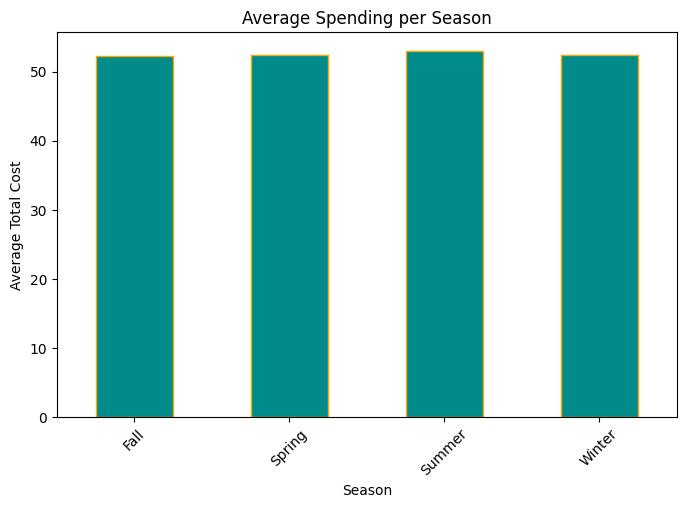

In [ ]:

# 3. Plot average spending per season

avg_spend_per_season = df.groupby('Season')['Total_Cost'].mean()

plt.figure(figsize=(8,5))
avg_spend_per_season.plot(kind='bar', color='darkcyan', edgecolor='orange')



plt.title("Average Spending per Season")
plt.xlabel("Season")
plt.ylabel("Average Total Cost")
plt.xticks(rotation=45)
plt.show()

# <font color="darkcyan" size="+3"><b>Task 6: Visualisation Dashboard</b></font>

# <font color="magenta" size="+2"><b>6.1 Bar Plot of Transactions per City</b></font>

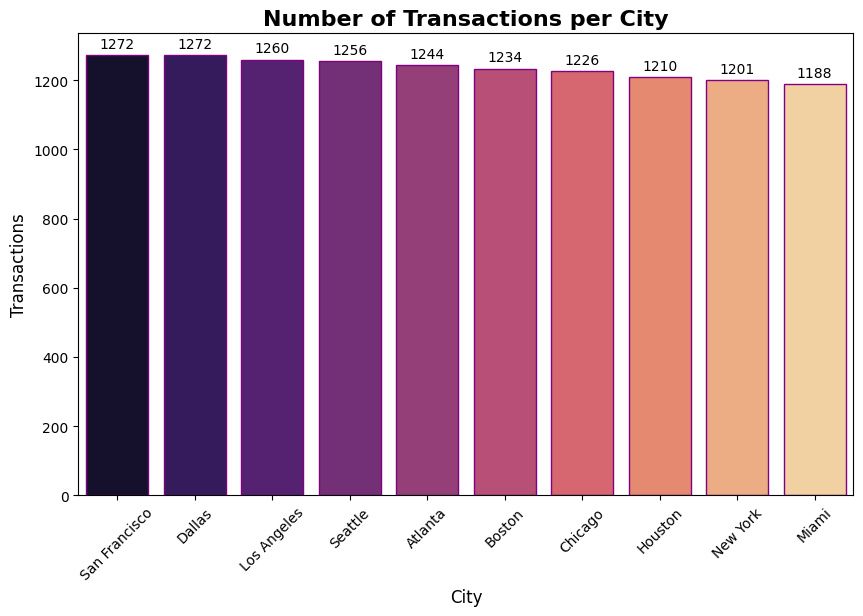

In [ ]:
# • Bar plot of number of transactions per city

# count of transaction per city
transactions_per_city = df['City'].value_counts()
transactions_df = transactions_per_city.reset_index()
transactions_df.columns = ['City', 'Transactions']


fig, ax = plt.subplots(figsize=(10, 6))

# *Assign hue same as x and turn legend off** (avoidsadded due to deprecation warning)

sns.barplot(
    data=transactions_df,
    x='City',
    y='Transactions',
    hue='City',
    legend=False,
    palette='magma',
    edgecolor='purple',
    ax=ax
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

ax.set_title('Number of Transactions per City', fontsize=16, fontweight='bold')
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Transactions', fontsize=12)
plt.xticks(rotation=45)

plt.show()


In [ ]:
payment_counts = df['Payment_Method'].value_counts()
print(payment_counts)

Payment_Method
Mobile Payment    3116
Debit Card        3103
Credit Card       3076
Cash              3068
Name: count, dtype: int64


# <font color="magenta" size="+2"><b>6.2 • Pie chart showing distribution of payment methods </b></font>

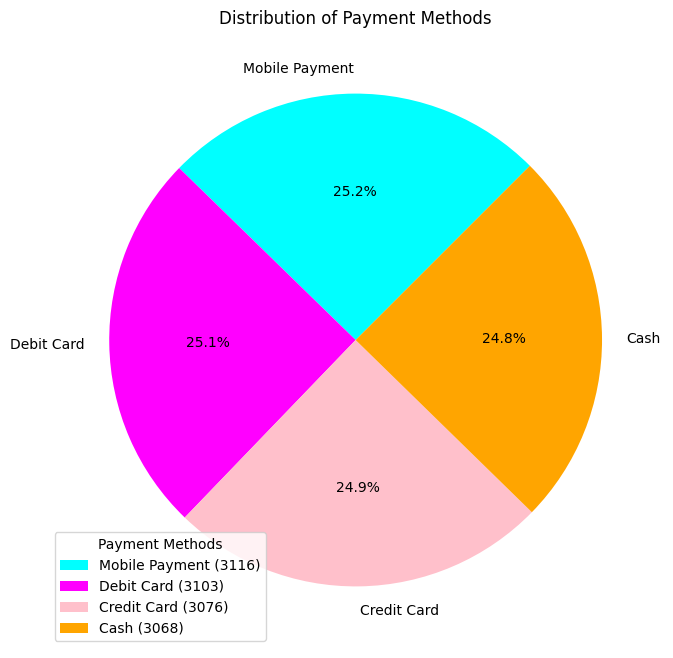

In [ ]:
# Count
payment_counts = df['Payment_Method'].value_counts()

# Create colorful pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=45,
        colors=['cyan', 'magenta', 'pink', 'orange'])

# Add legend
plt.legend(title="Payment Methods", labels=[f"{method} ({count})" for method, count in zip(payment_counts.index, payment_counts)])

plt.title("Distribution of Payment Methods")

plt.show()

# <font color="magenta" size="+2"><b>6.3 • Line chart of monthly revenue trends (grouped by year if applicable)  </b></font>

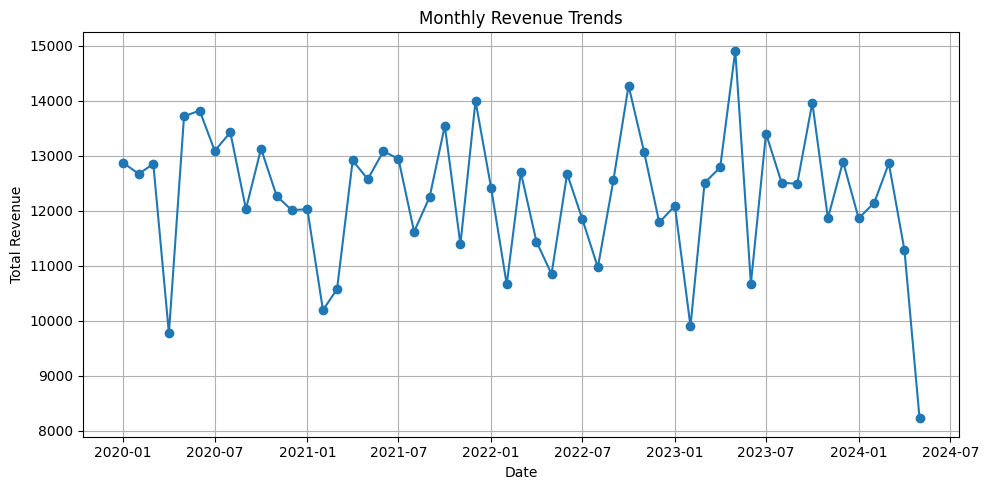

In [ ]:
# 3. Line chart of monthly revenue trends


# Calculate monthly revenue
monthly_revenue = df.groupby(['Year', 'Month'])['Total_Cost'].sum().reset_index()

# Create a proper datetime column
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Date'], monthly_revenue['Total_Cost'], marker='o')
plt.title("Monthly Revenue Trends")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

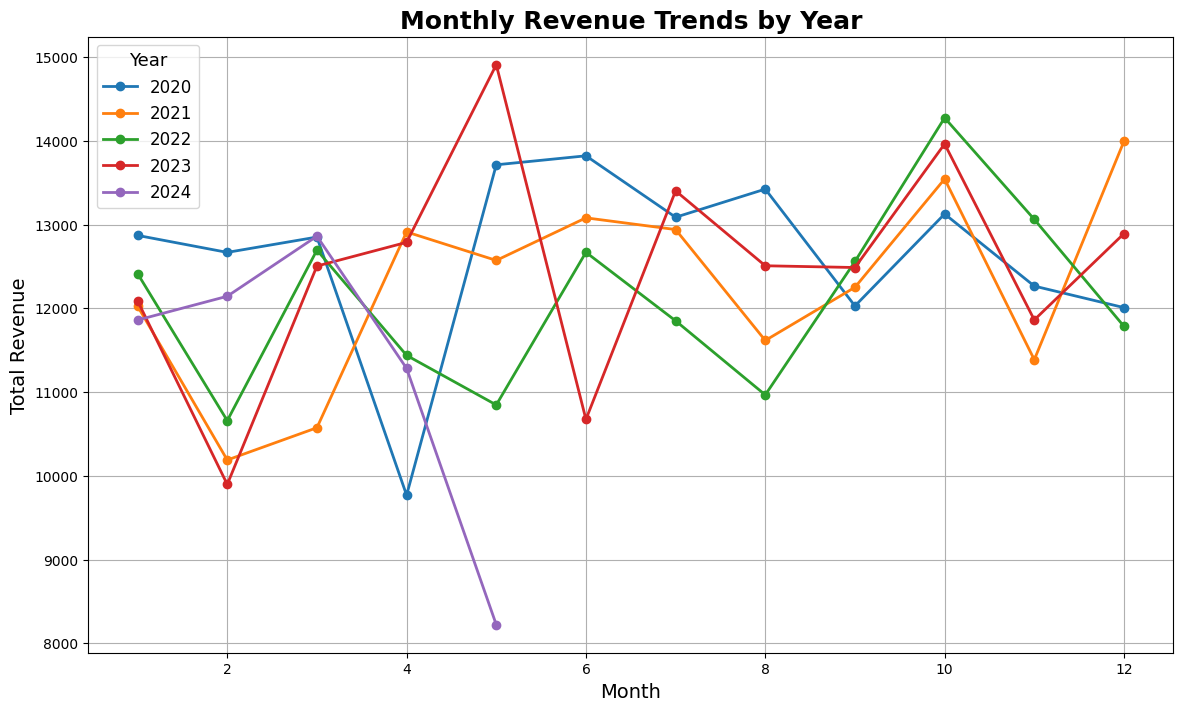

In [ ]:


# 3.Monthly revenue grouped by Year & Month

monthly_revenue = df.groupby(['Year', 'Month'])['Total_Cost'].sum().reset_index()

# Pivot so that each year is a separate line
pivot_data = monthly_revenue.pivot(index='Month', columns='Year', values='Total_Cost')

# Increase figure size for better visibility
plt.figure(figsize=(14, 8))
pivot_data.plot(marker='o', linewidth=2, figsize=(14, 8))
plt.title("Monthly Revenue Trends by Year", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.grid(True)
plt.legend(title="Year", fontsize=12, title_fontsize=13)
plt.show()





# <font color="magenta" size="+2"><b>6.4 • Stacked bar showing revenue by season and customer category   </b></font>

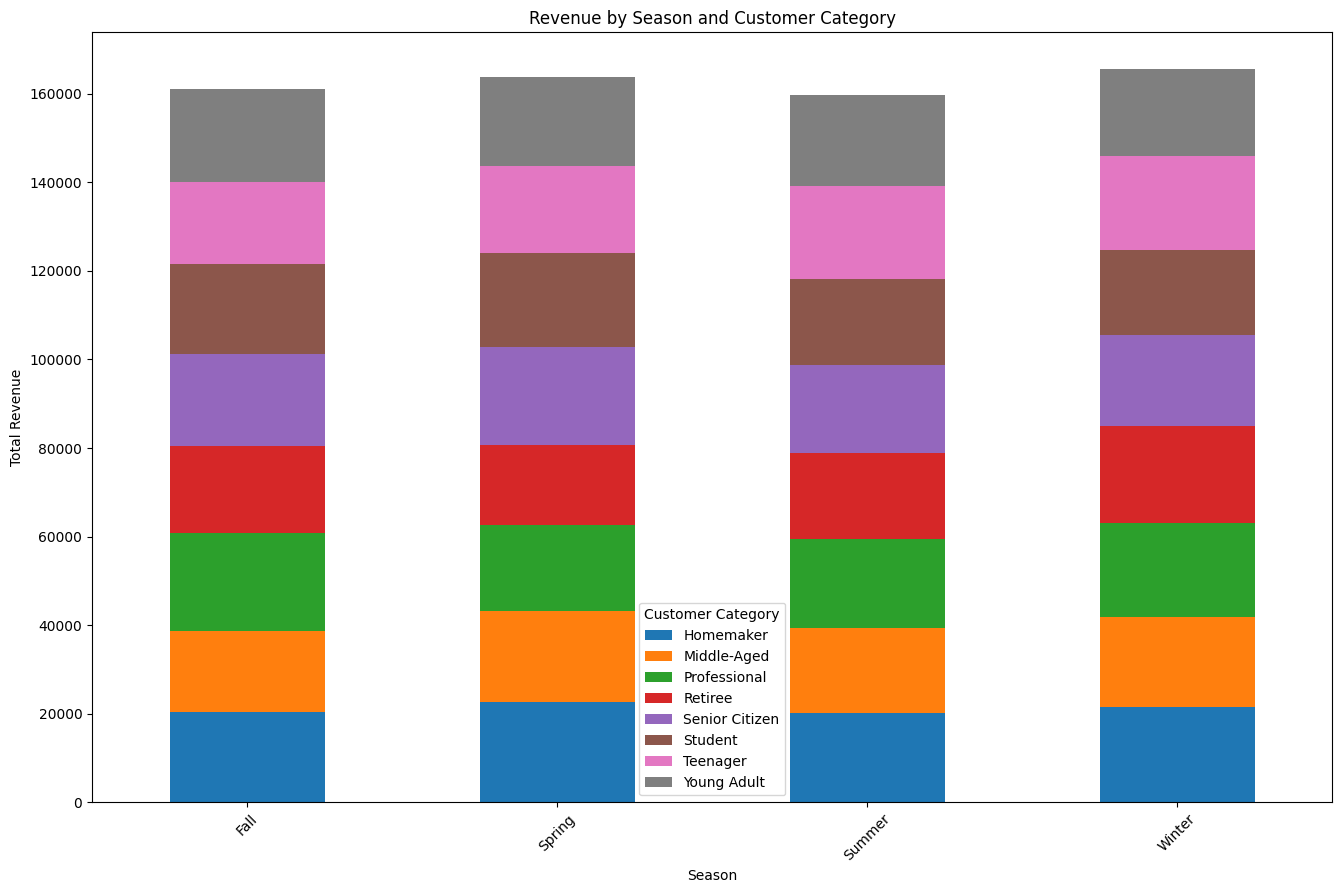

In [ ]:
# 4. Stacked bar showing revenue by season and customer category
revenue_season_customer = df.groupby(['Season', 'Customer_Category'])['Total_Cost'].sum().unstack()

revenue_season_customer.plot(kind='bar', stacked=True, figsize=(16,10))
plt.title("Revenue by Season and Customer Category")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title="Customer Category")
plt.show()

In [ ]:
from IPython.display import display, Markdown

summary_md = """
# **✨ Key Insights – What the Numbers Tell Us**

This retail story is clear: **premium customers** don’t just buy, they invest — spending more per trip than anyone else.
Everyday staples like **toothpaste**, **soap**, and **shampoo** quietly dominate sales, proving that essentials keep the tills ringing.

Promotions like **Buy One Get One** give a gentle nudge to spending, but it’s the **supermarkets** and **warehouse clubs** that truly power revenue.
Seasonally, **summer** shines brightest for sales, with **spring** following closely behind.

Geographically, the retail heartbeat is loudest in **Boston**, **Dallas**, and **Seattle**.
And when we zoom out over the months, the revenue arc swells mid-year before easing, with year-to-year trends holding steady — a sign of a well-balanced business rhythm.
"""

display(Markdown(summary_md))



# **✨ Key Insights – What the Numbers Tell Us**

This retail story is clear: **premium customers** don’t just buy, they invest — spending more per trip than anyone else.  
Everyday staples like **toothpaste**, **soap**, and **shampoo** quietly dominate sales, proving that essentials keep the tills ringing.  

Promotions like **Buy One Get One** give a gentle nudge to spending, but it’s the **supermarkets** and **warehouse clubs** that truly power revenue.  
Seasonally, **summer** shines brightest for sales, with **spring** following closely behind.  

Geographically, the retail heartbeat is loudest in **Boston**, **Dallas**, and **Seattle**.  
And when we zoom out over the months, the revenue arc swells mid-year before easing, with year-to-year trends holding steady — a sign of a well-balanced business rhythm.


# <font color="orange" size="+1"><b>The retail transaction analysis revealed that premium customers spend the most on average, toothpaste and other daily essentials dominate sales, and summer generates the highest revenue. Supermarkets and warehouse clubs drive the bulk of revenue, with Boston, Dallas, and Seattle leading in transaction volume   </b></font>